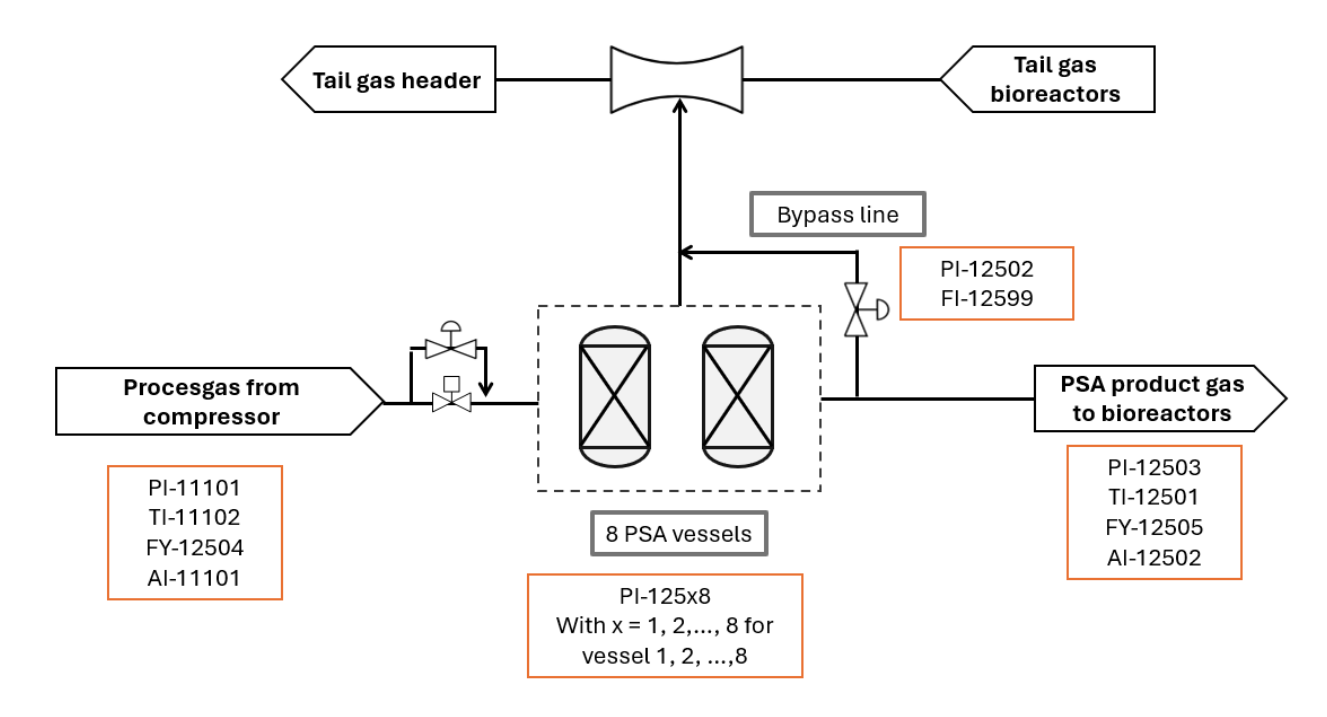

In [1]:
import numpy as np
# --- NÚMEROS CON TUS DATOS ---
D = 3.8
A = np.pi * (D/2)**2
m_full_water_kg = 95600
m_empty_kg = 26490
h_bed = 4.83  

Volume = (m_full_water_kg - m_empty_kg)/1000                  # 69.11 m3
h= Volume / A                                                 # 6.09

In [2]:
import os,sys
ruta_libs = os.path.abspath("libs")
if ruta_libs not in sys.path:
    sys.path.append(ruta_libs)
    
from helpLibs import *

DATA_PATH = r"C:\Users\MiguelCamaraSanz\OneDrive - Fundacion CIRCE\Escritorio\github\ProSimNet\validacion\psa_data.csv"   # <-- AJUSTA ESTO

t0 = "2025-04-25 00:00:01"   
t1 = "2025-04-27 23:59:59"  

df, meta = getPSAdata(DATA_PATH, start=t0,end=t1)

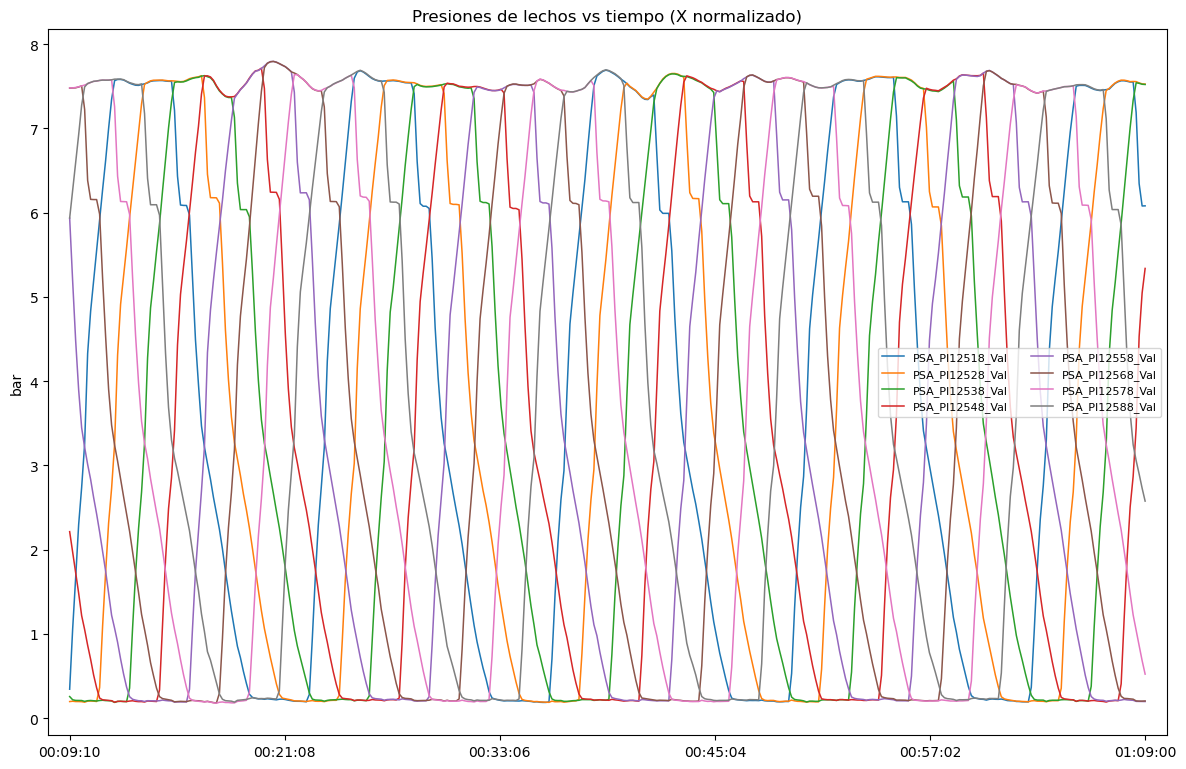

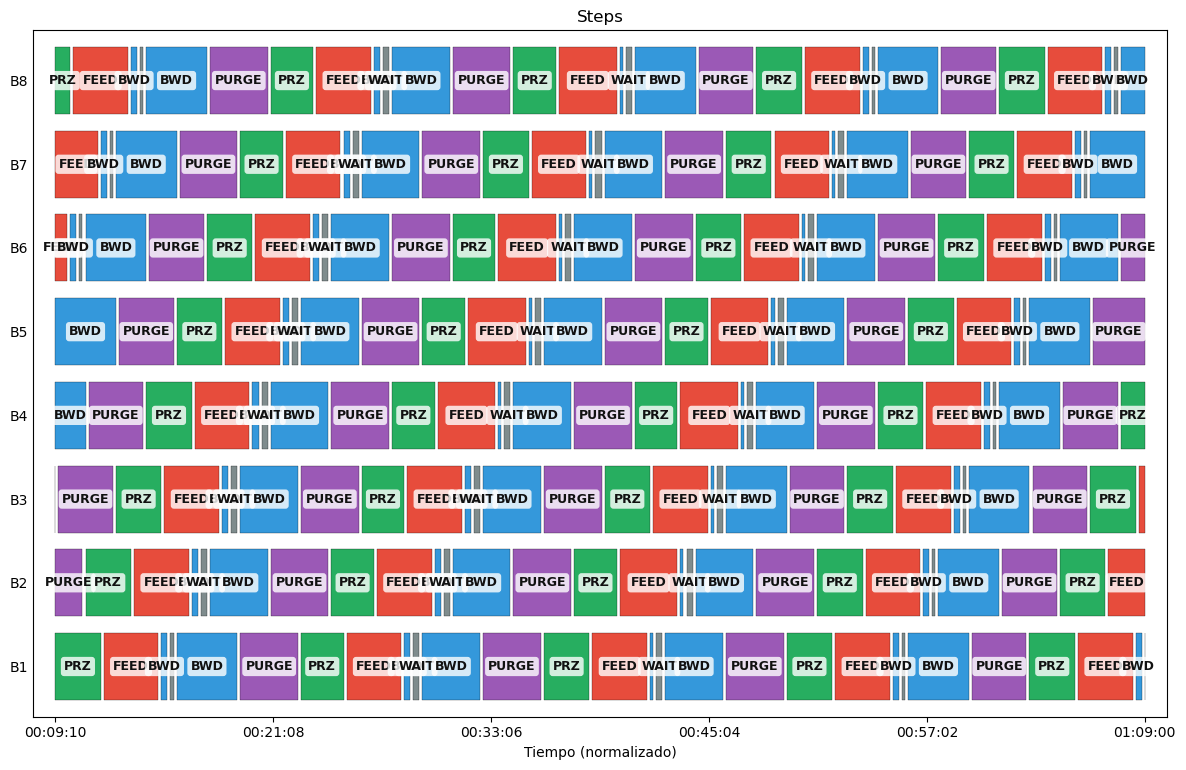

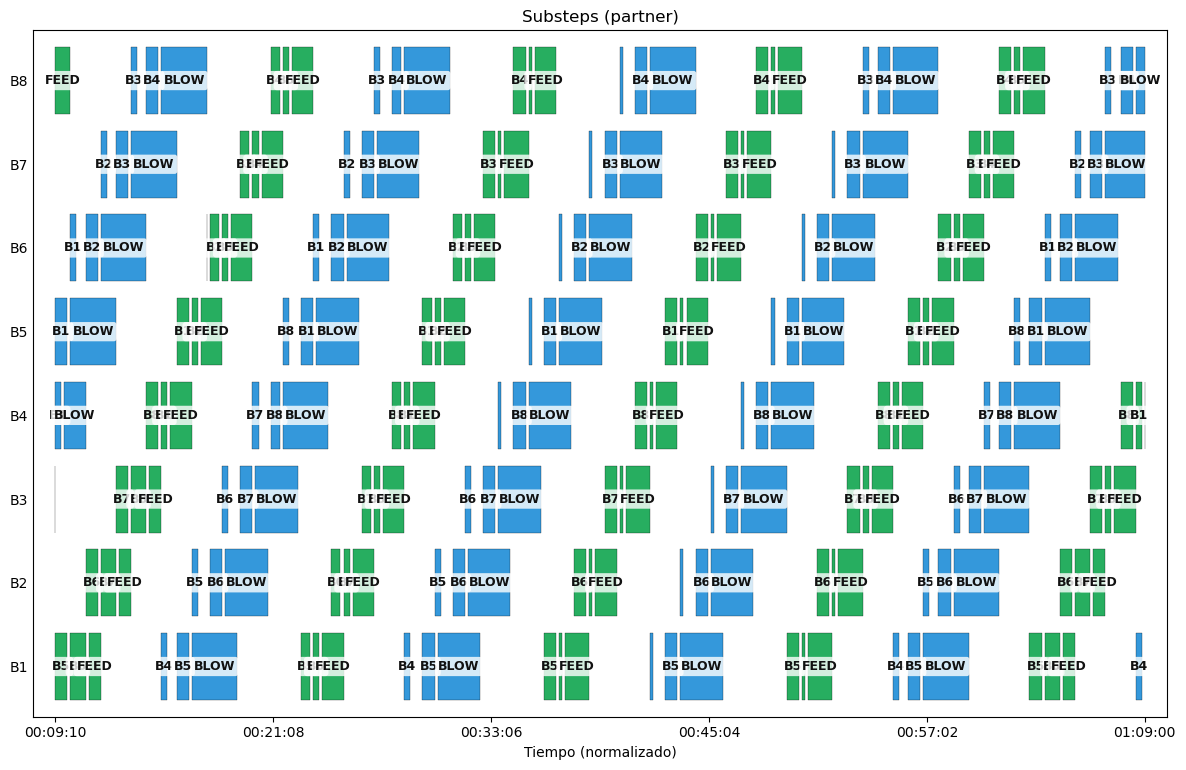

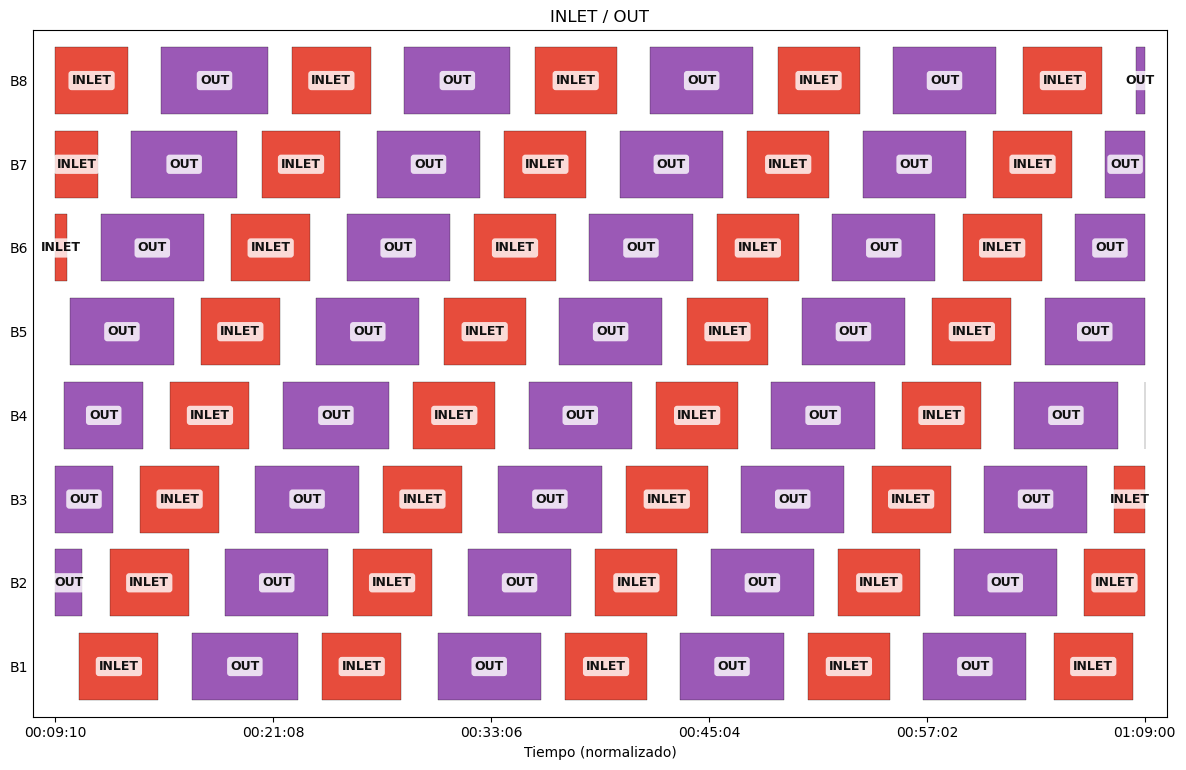

In [3]:
t0 = "2025-04-25 00:09:1"   
t1 = "2025-04-25 01:09:1"
plot_beds_pressure(df, start=t0, end=t1)
plot_steps_gantt(df, start=t0, end=t1, mode="steps")
plot_steps_gantt(df, start=t0, end=t1, mode="substeps")
plot_steps_gantt(df, start=t0, end=t1, mode="inout",bridge_gap_s=50)

In [4]:
t0 = "2025-04-23 14:07:00"   
t1 = "2025-04-26 14:20:40"  
result = compute_cycle_times(df, start=t0, end=t1, anchor_bed="b1", decimals=2)
print("Ancla temporal:", result["anchor_time"])
result["summary_steps"]

Ancla temporal: 2025-04-25 00:09:10


,bed,cycle_min,PRZ_min,FEED_min,BWD_min,PURGE_min,WAIT_min,cycle_count
0,b1,13.37,2.60,3.21,3.85,3.28,0.43,171
1,b2,13.37,2.62,3.20,3.84,3.27,0.44,171
2,b3,13.37,2.61,3.21,3.86,3.26,0.44,171
3,b4,13.37,2.61,3.21,3.84,3.29,0.43,170
4,b5,13.37,2.62,3.20,3.81,3.30,0.44,170
5,b6,13.37,2.59,3.22,3.82,3.30,0.43,170
6,b7,13.37,2.62,3.19,3.83,3.29,0.44,170
7,b8,13.37,2.60,3.21,3.87,3.25,0.44,170


In [5]:
result["summary_substeps"]

,bed,PRZ_1_min,PRZ_2_min,PRZ_FEED_min,BWD_1_min,BWD_2_min,BWD_PURGE_min,cycle_count
0,b1,0.77,0.50,1.33,0.45,1.20,2.21,171
1,b2,0.79,0.45,1.36,0.45,1.19,2.21,171
2,b3,0.77,0.49,1.34,0.44,1.17,2.25,171
3,b4,0.78,0.48,1.34,0.44,1.14,2.25,170
4,b5,0.75,0.51,1.35,0.44,1.17,2.21,170
5,b6,0.73,0.54,1.32,0.44,1.19,2.20,170
6,b7,0.77,0.50,1.35,0.44,1.17,2.22,170
7,b8,0.78,0.47,1.34,0.45,1.15,2.28,170


In [6]:
result["summary_inout"]

,bed,INLET_min,OUT_min,cycle_count
0,b1,4.54,5.49,171
1,b2,4.57,5.49,171
2,b3,4.55,5.51,171
3,b4,4.55,5.54,170
4,b5,4.55,5.52,170
5,b6,4.54,5.50,170
6,b7,4.55,5.52,170
7,b8,4.56,5.53,170


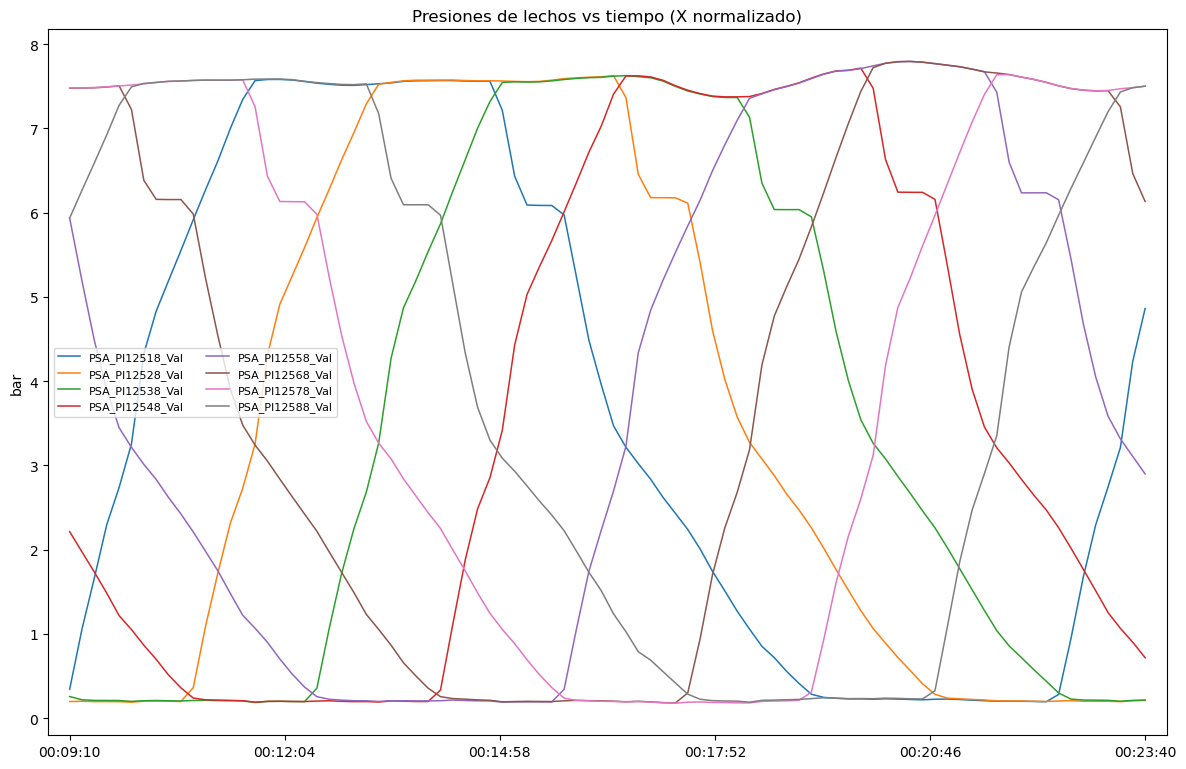

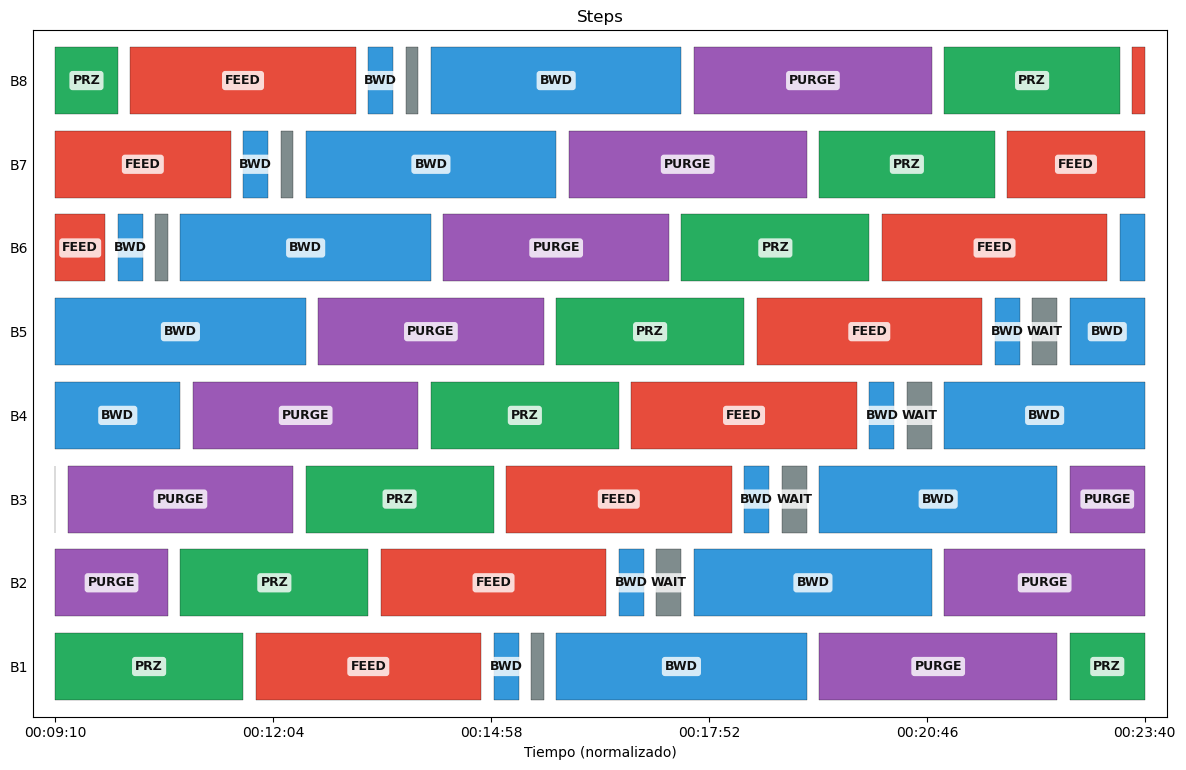

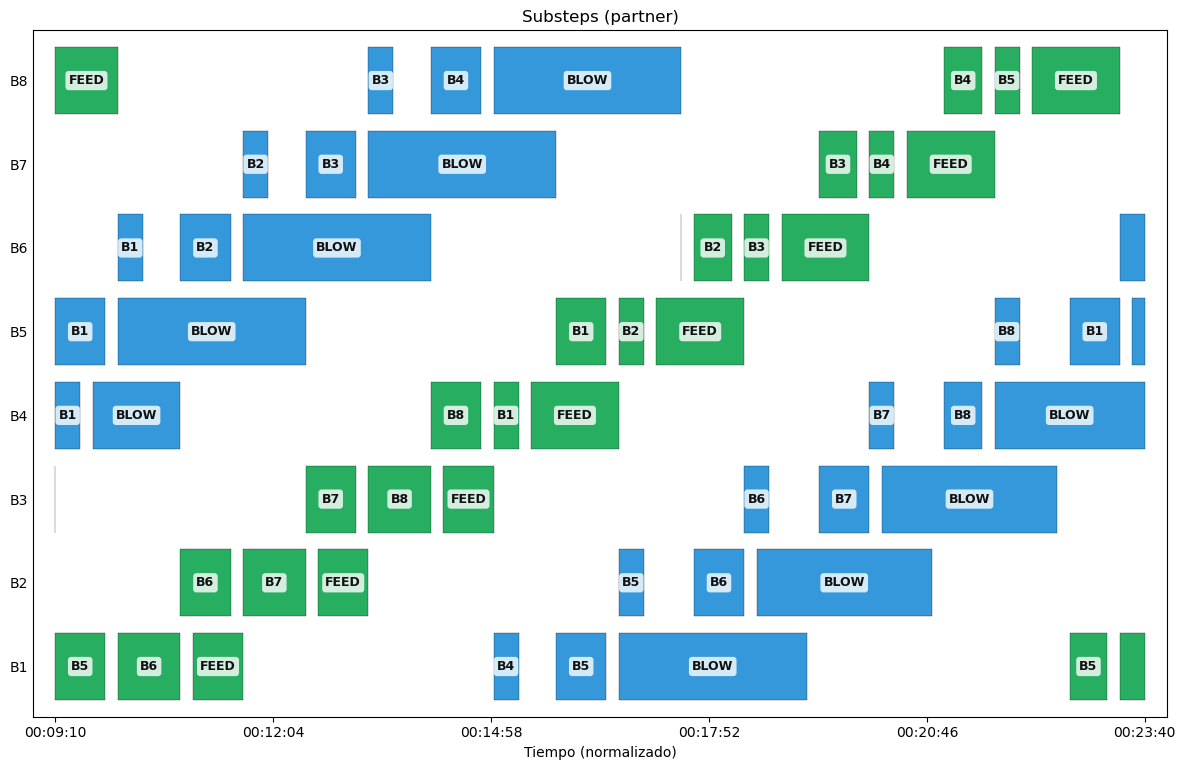

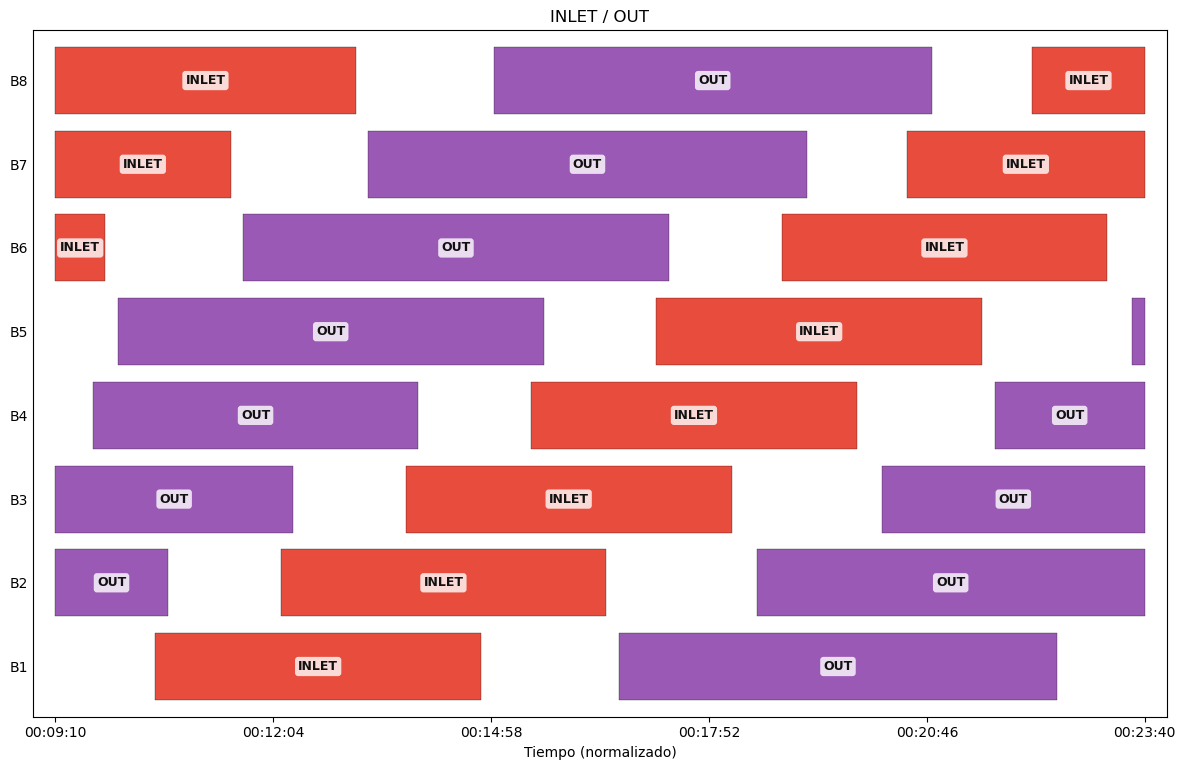

In [7]:
t0 = "2025-04-25 00:09:01"
t1 = "2025-04-25 00:23:42"
plot_beds_pressure(df, start=t0, end=t1)
plot_steps_gantt(df, start=t0, end=t1, mode="steps")
plot_steps_gantt(df, start=t0, end=t1, mode="substeps")
plot_steps_gantt(df, start=t0, end=t1, mode="inout",bridge_gap_s=50)

In [8]:
przfeed_flows = compute_przfeed_flow(df, volumes_m3=69.11, T_col="SIS_TI11102_Val")


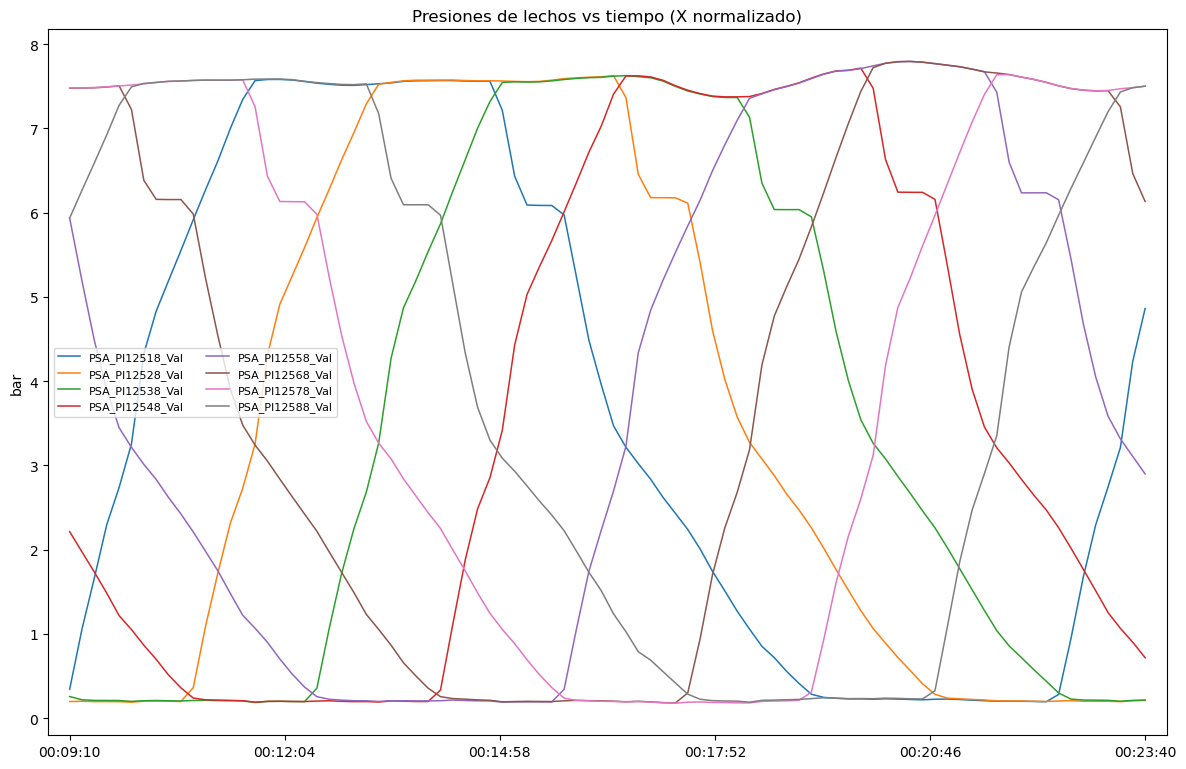

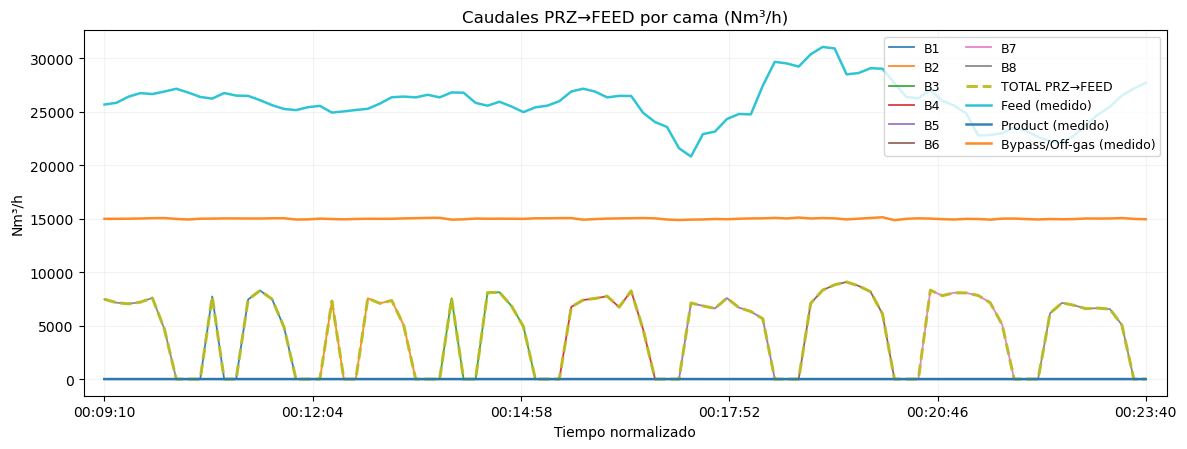

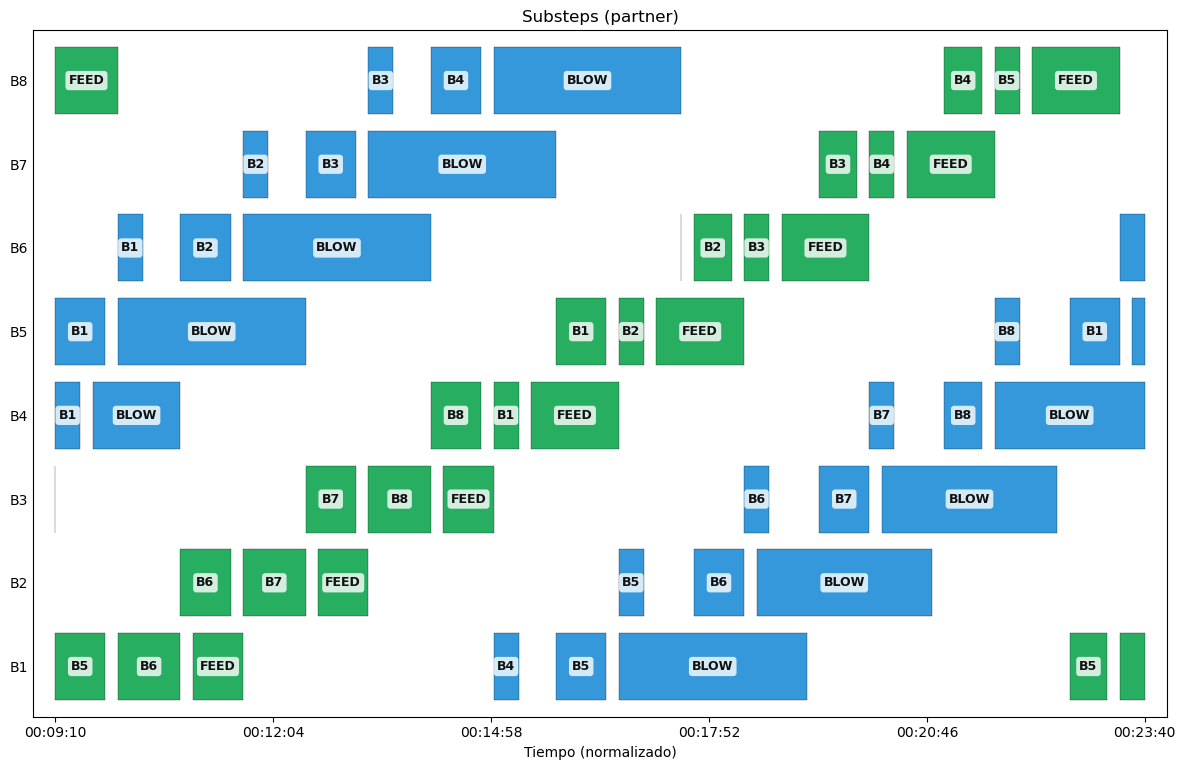

In [15]:
plot_beds_pressure(df, start=t0, end=t1)

plot_przfeed_flow(
    przfeed_flows, units="Nm3",
    start=t0,
    end=t1,
)
plot_steps_gantt(df, start=t0, end=t1, mode="substeps")
